# Import libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Data import

In [2]:
Wine=pd.read_csv("WineQT.csv")
Wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


# Data processing

In [3]:
Wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [4]:
Wine = Wine.drop("Id",axis=1)
Wine.head() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
Wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
Wine.describe().T.style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.000000,8.311111,1.747595,4.600000,7.100000,7.900000,9.100000,15.900000
volatile acidity,1143.000000,0.531339,0.179633,0.120000,0.392500,0.520000,0.640000,1.580000
citric acid,1143.000000,0.268364,0.196686,0.000000,0.090000,0.250000,0.420000,1.000000
residual sugar,1143.000000,2.532152,1.355917,0.900000,1.900000,2.200000,2.600000,15.500000
chlorides,1143.000000,0.086933,0.047267,0.012000,0.070000,0.079000,0.090000,0.611000
free sulfur dioxide,1143.000000,15.615486,10.250486,1.000000,7.000000,13.000000,21.000000,68.000000
total sulfur dioxide,1143.000000,45.914698,32.782130,6.000000,21.000000,37.000000,61.000000,289.000000
density,1143.000000,0.996730,0.001925,0.990070,0.995570,0.996680,0.997845,1.003690
pH,1143.000000,3.311015,0.156664,2.740000,3.205000,3.310000,3.400000,4.010000
sulphates,1143.000000,0.657708,0.170399,0.330000,0.550000,0.620000,0.730000,2.000000


# Data visualisation

7.9 is the median value for -- fixed acidity


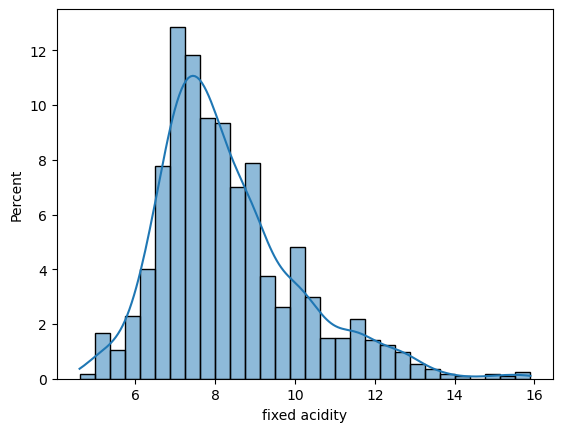

0.52 is the median value for -- volatile acidity


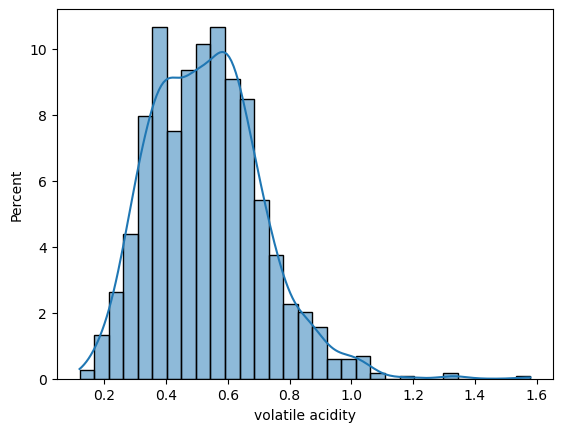

0.25 is the median value for -- citric acid


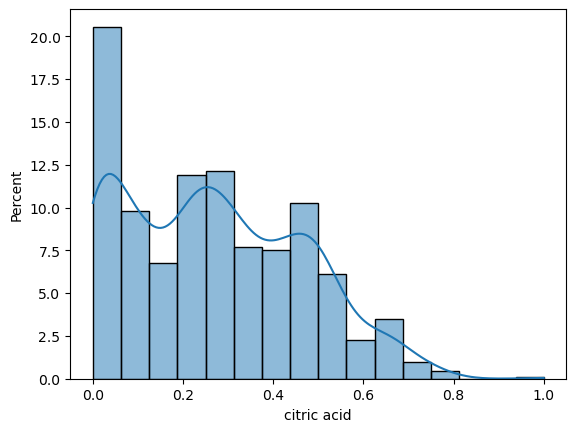

2.2 is the median value for -- residual sugar


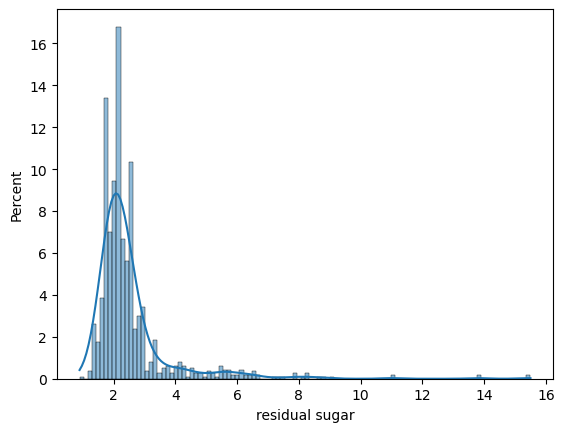

0.079 is the median value for -- chlorides


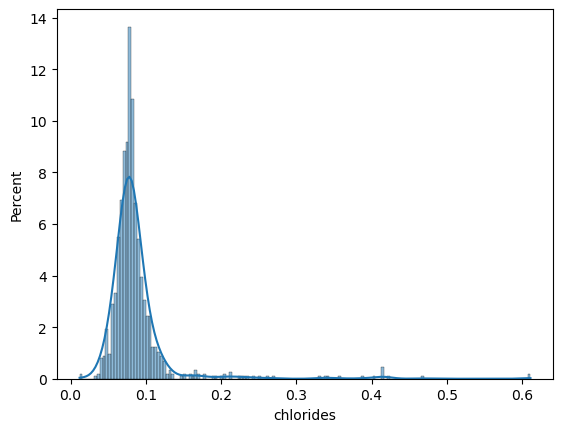

13.0 is the median value for -- free sulfur dioxide


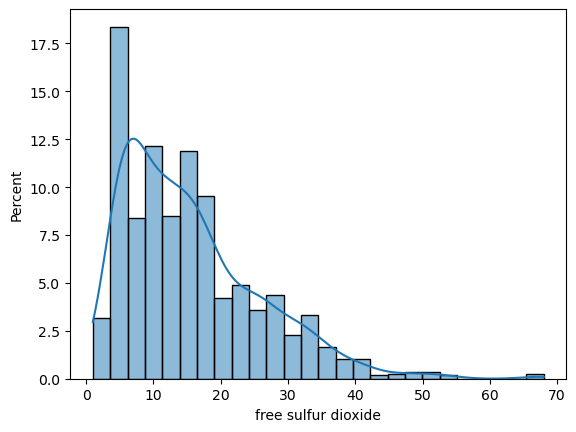

37.0 is the median value for -- total sulfur dioxide


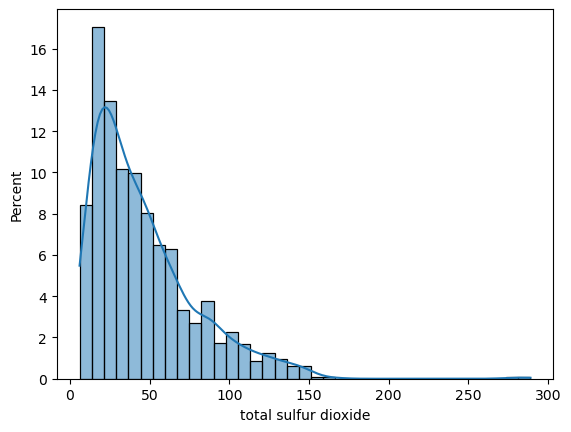

0.99668 is the median value for -- density


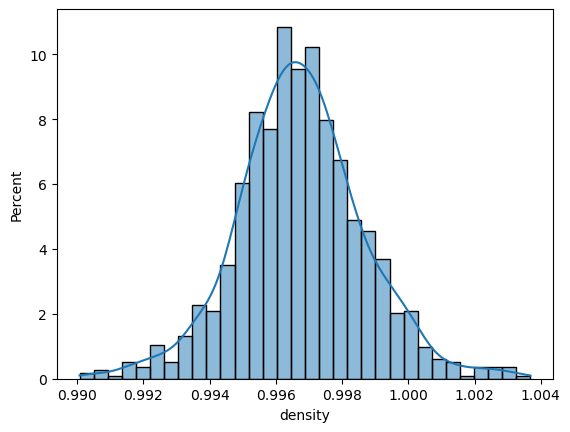

3.31 is the median value for -- pH


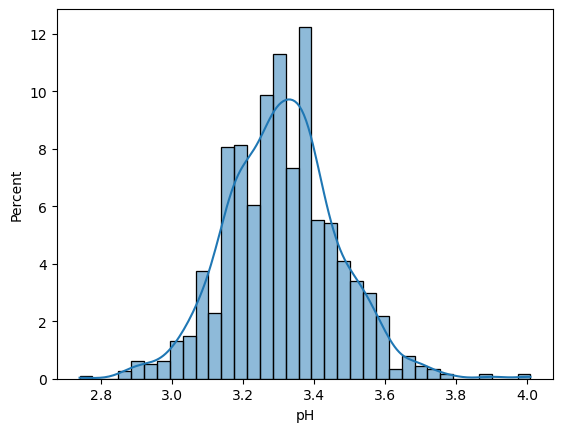

0.62 is the median value for -- sulphates


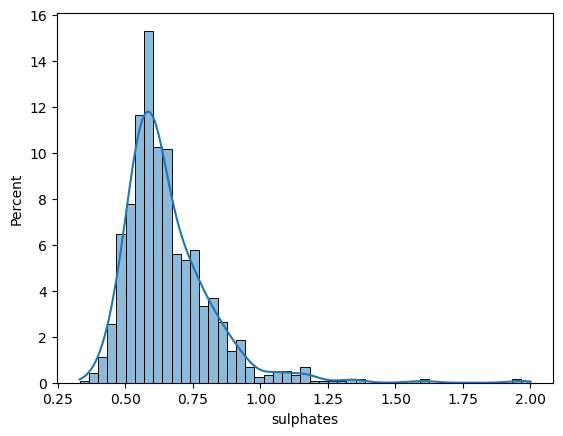

10.2 is the median value for -- alcohol


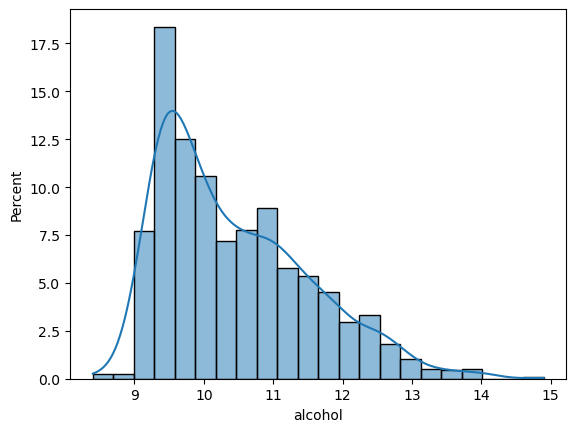

6.0 is the median value for -- quality


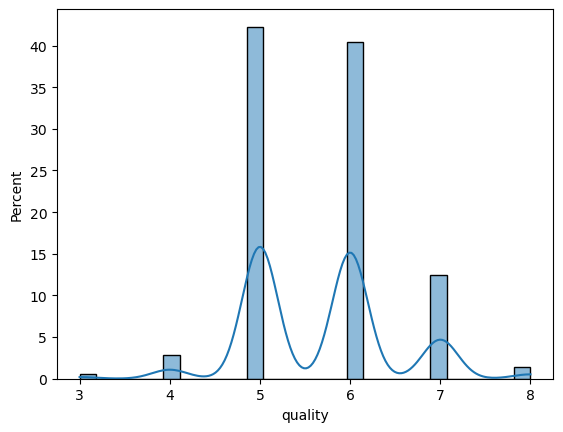

In [7]:
#creating histogram
for column in Wine.columns:
        print(f"{np.median(Wine[column])} is the median value for -- {column}")
        sns.histplot(data=Wine, x=column, stat='percent',kde=True)
        plt.show()

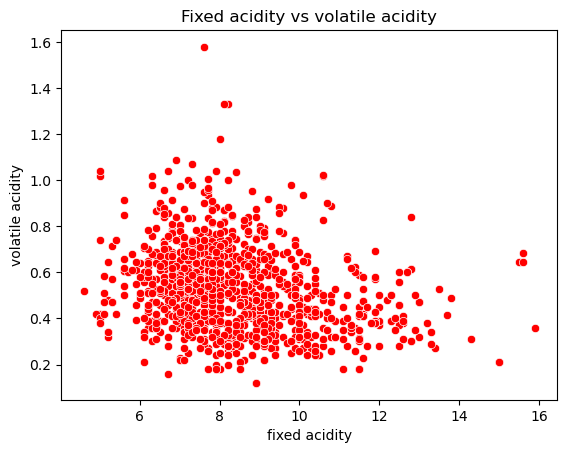

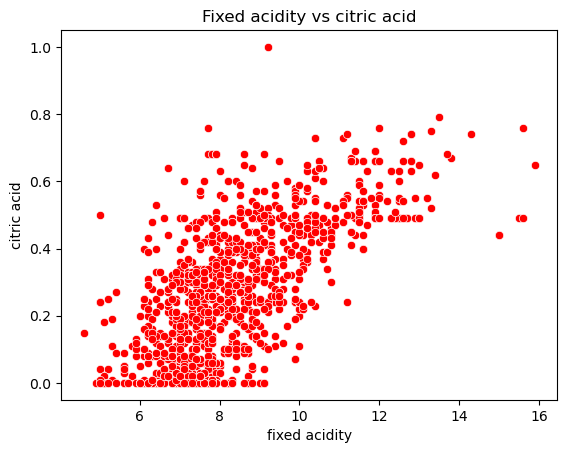

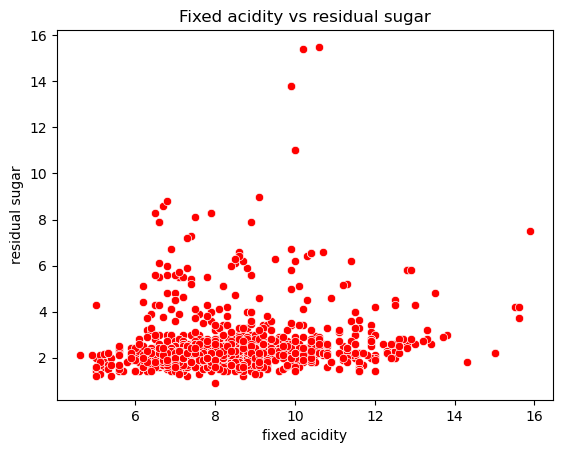

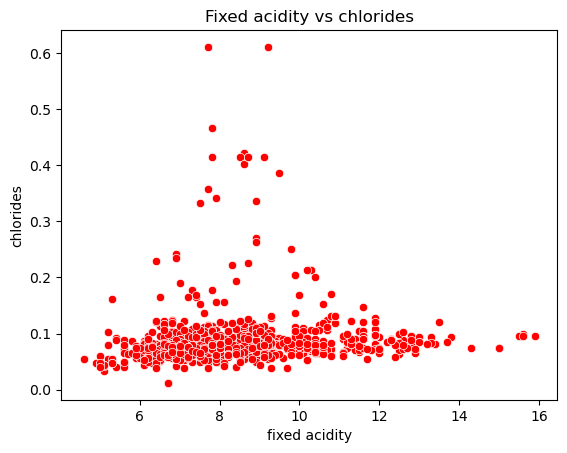

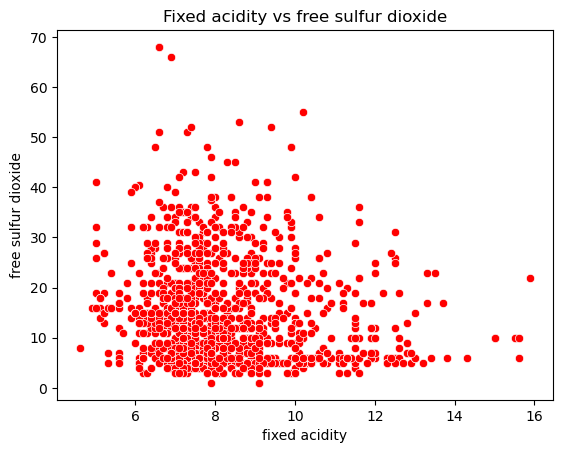

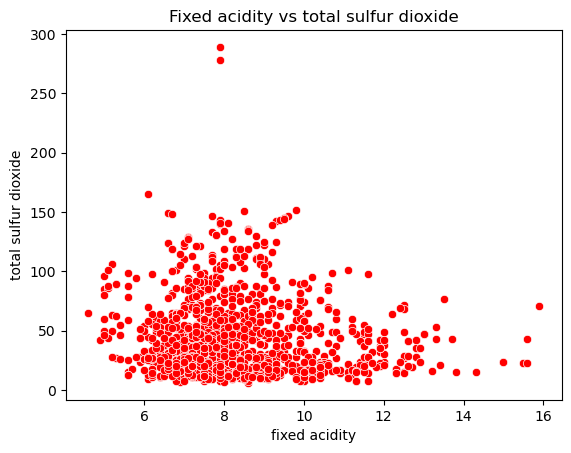

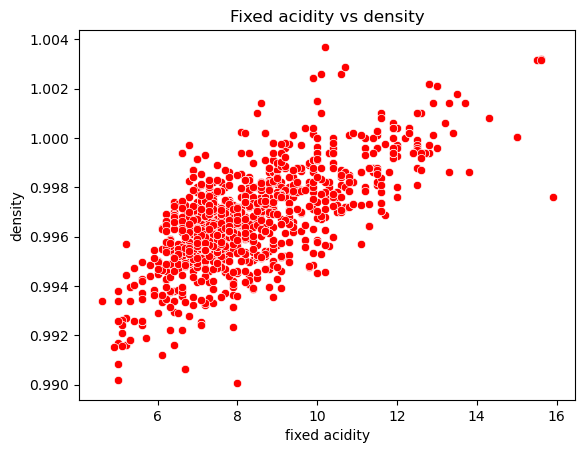

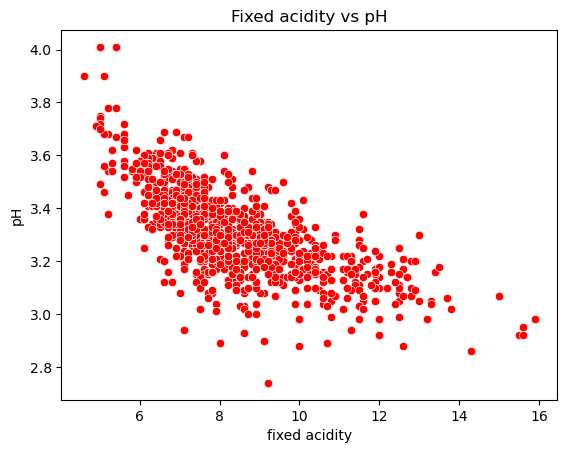

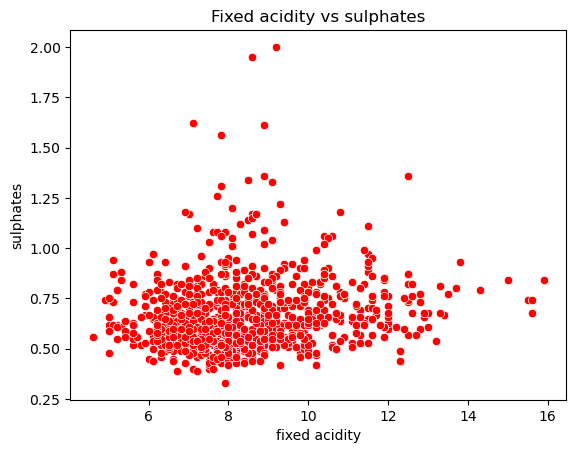

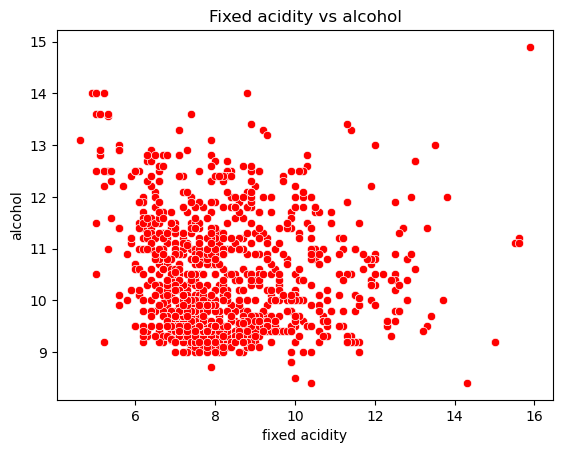

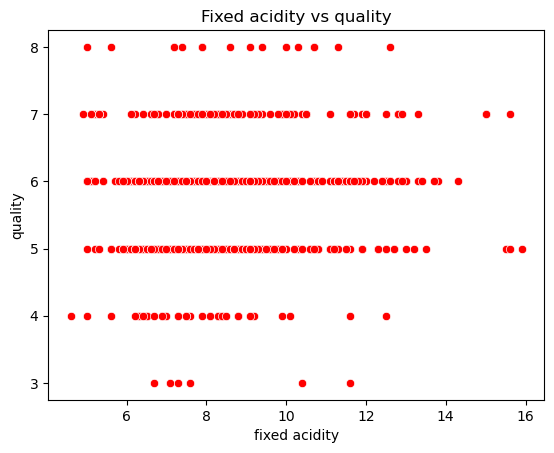

In [8]:
# Scatter plot
columns = ['volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

for column in columns:
    plt.title(f"Fixed acidity vs {column}")
    sns.scatterplot(data=Wine, x='fixed acidity', y=column,color='red')
    plt.show()

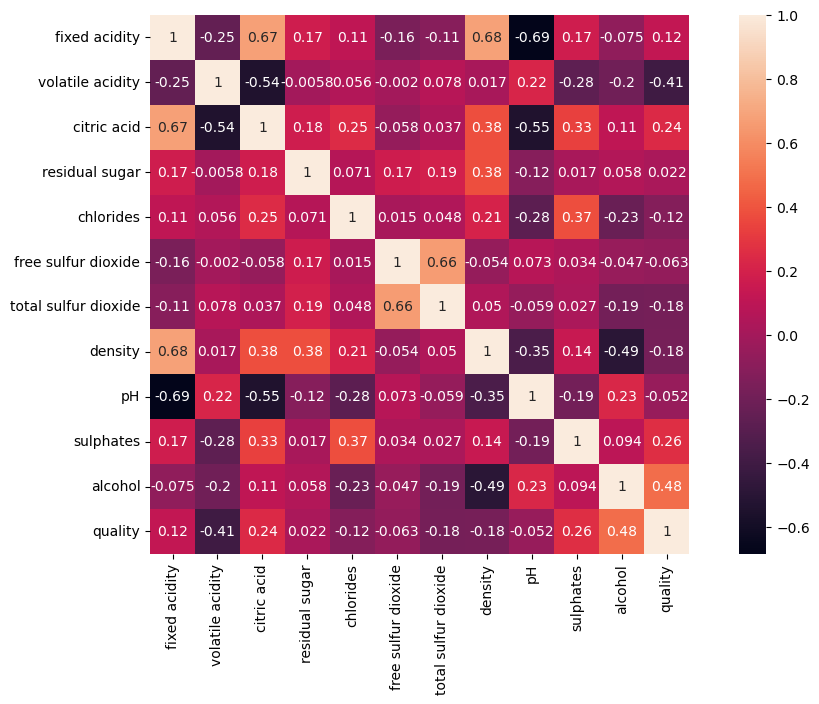

In [9]:
correlation_matrix = Wine.corr()
plt.subplots(figsize=(13,7))
sns.heatmap(data = correlation_matrix, annot=True, square=True)
plt.show()

# Feature scaling

In [11]:
scaler = StandardScaler()
scaled_Wine = scaler.fit_transform(Wine)

# PCA

In [12]:
pca = PCA(n_components=2)
pca.fit(scaled_Wine)
scores_pca = pca.transform(scaled_Wine)

# Number of cluster

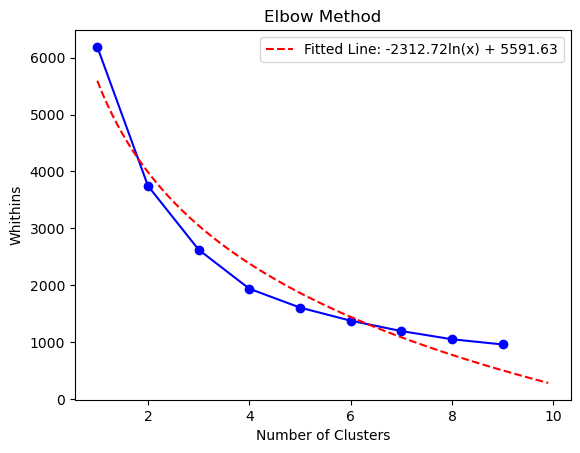

In [13]:
whithins = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init="k-means++", n_init=10, random_state=42)
    kmeans.fit(scores_pca)
    whithins.append(kmeans.inertia_)

# Elbow Method with Fitted Line
plt.plot(range(1, 10), whithins, marker='o', linestyle='-', color='b')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Whithins")

# Fit a line to the elbow curve
from scipy.optimize import curve_fit

def func(x, a, b):
    return a * np.log(x) + b

popt, pcov = curve_fit(func, range(1, 10), whithins)
x_values = np.arange(1, 10, 0.1)
plt.plot(x_values, func(x_values, *popt), color='r', linestyle='--', label=f'Fitted Line: {popt[0]:.2f}ln(x) + {popt[1]:.2f}')

plt.legend()
plt.show()

# Kmeans

In [14]:
# KMeans
kmeans = KMeans(n_clusters=3, init="k-means++", n_init=10, random_state=42)
kmeans.fit(scores_pca)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [15]:
# DataFrame with PCA Components and Cluster Labels
kmeans_df = pd.DataFrame(scores_pca, columns=["Component 1", "Component 2"])
kmeans_df["Cluster"] = kmeans.labels_

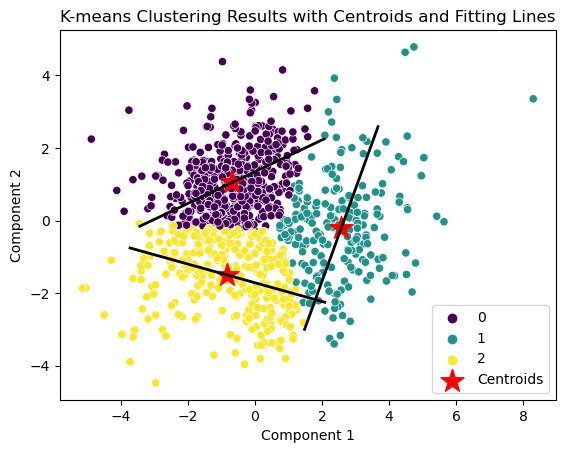

In [16]:
# Scatter plot with Clusters
sns.scatterplot(x=kmeans_df["Component 1"], y=kmeans_df["Component 2"], hue=kmeans_df["Cluster"], palette="viridis")

# Plotting the centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='red', label='Centroids')

# Plotting the fitting lines for each cluster
for i in range(len(centroids)):
    cluster_points = scores_pca[kmeans.labels_ == i]
    # Perform linear regression to find the line of best fit for the cluster
    pca_cluster = PCA(n_components=1)
    pca_cluster.fit(cluster_points)
    line_direction = pca_cluster.components_[0]
    line_point = np.mean(cluster_points, axis=0)
    line_start = line_point - line_direction * 3  # Adjust length of line
    line_end = line_point + line_direction * 3    # Adjust length of line
    plt.plot([line_start[0], line_end[0]], [line_start[1], line_end[1]], 'k-', lw=2)

plt.title("K-means Clustering Results with Centroids and Fitting Lines")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend()
plt.show()

# Data spliting for Random Forest Classifier

In [17]:
from sklearn.model_selection import train_test_split

X = Wine.drop(["quality"], axis=1)
y = Wine["quality"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape - X:", X_train.shape, "y:", y_train.shape)
print("Testing set shape - X:", X_test.shape, "y:", y_test.shape)

Training set shape - X: (914, 11) y: (914,)
Testing set shape - X: (229, 11) y: (229,)


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [19]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

In [20]:
# Train the classifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
# Predictions on the testing set
y_pred_rf = rf_classifier.predict(X_test)

In [22]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy Score: {:.2f}%".format(accuracy * 100))

Accuracy Score: 70.31%


In [23]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Classification Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.72      0.80      0.76        96
           6       0.68      0.67      0.67        99
           7       0.72      0.69      0.71        26
           8       0.00      0.00      0.00         2

    accuracy                           0.70       229
   macro avg       0.42      0.43      0.43       229
weighted avg       0.68      0.70      0.69       229



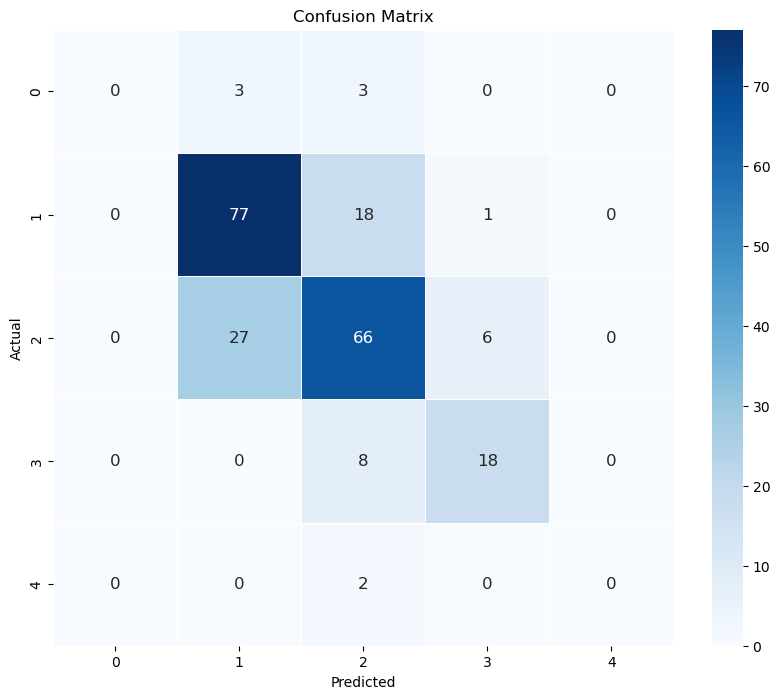

In [24]:
# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', linewidths=.5, annot_kws={"fontsize":12})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()